In [23]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## part(a)

In [38]:
def regression_fit(X):
    '''
    arg: X is an array which has a series of X values
    
    '''
    X= X.flatten()
    Y = X.copy()
    Y = Y[1:] #take X1,X2,...,Xn as dependent variable values
    X = X[:-1] #take X0,X1,...,X_(n-1) as independent variable values
    Xnew = np.zeros(len(X))
    Xnew[np.where(X<0)]=-X[np.where(X<0)]
    model = sm.OLS(Y,Xnew).fit() #fit the Simple linear regression model
    print(model.summary())
    plt.scatter(Xnew,Y,label = 'real')
    plt.scatter(Xnew,model.fittedvalues,label='predicted')
    plt.legend()
    plt.show()
    phi = float(model.params)
    sigma_sqr = float((model.bse)**2*np.dot(Xnew,Xnew)) #Assume Z has variance 1
    print('estimated phi value: ',phi,'\n')
    print('estimated sigma squared value: ',sigma_sqr)
    

## part(b)

In [82]:
def path_generator(X0, phi, sigma,k,partial_plot = 0):
    X = np.zeros(k)
    X[0] = X0
    for i in range(k-1):
        z = np.random.randn()
        X[i+1]=phi * max(-X[i],0) + sigma * z
    plt.plot(np.arange(k)[partial_plot:],X[partial_plot:])
    plt.show()
    return X

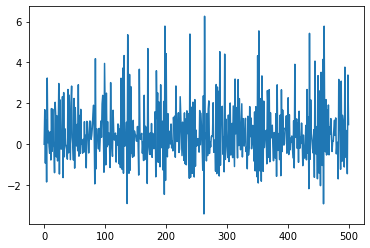

In [60]:
X = path_generator(0,2,1,500)

Mean-reversion displayed. Worth checking stationarity.

In [72]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import kpss, adfuller
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

def first_step(df,name):
    fig,ax=plt.subplots(1,1,figsize=(10,5))
    plot_acf(df,ax=ax)
    ax.set_title(name+' ACF plot')
    
    num = len(df)
    maxLag = int(np.log(num))
    adf = adfuller(df,maxlag=maxLag)
    print('p value for ADF test: ',adf[1])
    kpss_ = kpss(df,nlags=maxLag)
    print('p value for KPSS test: ',kpss_[1],'\n')
    print('statistics for KPSS: ',kpss_[0],' criteria: ',kpss_[-1])
    
    
    plt.show()

p value for ADF test:  2.4593828036100948e-24
p value for KPSS test:  0.1 

statistics for KPSS:  0.025399355231931986  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


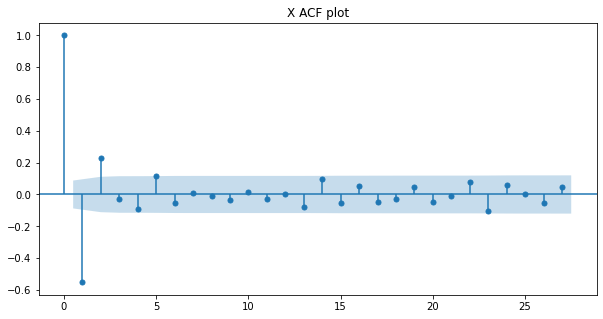

In [73]:
first_step(X,'X')

Hence the generated X is stationary by the result of ADF and KPSS tests.

## part(c)

X0 =  0.0


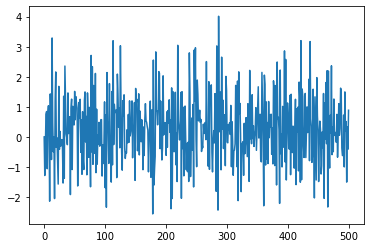



X0 =  10.0


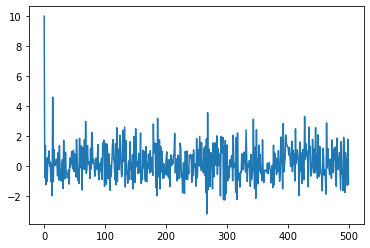



X0 =  20.0


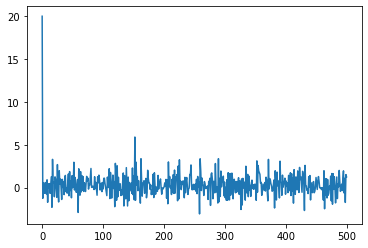



X0 =  30.0


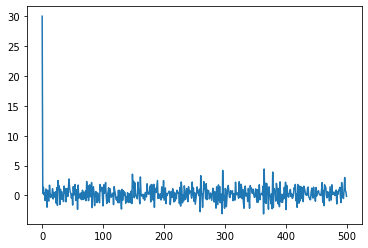



X0 =  40.0


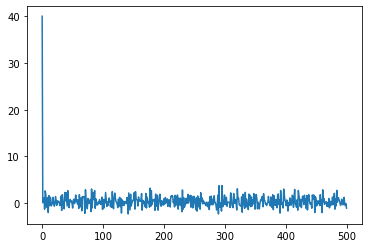



X0 =  50.0


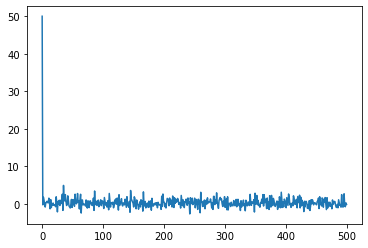



X0 =  60.0


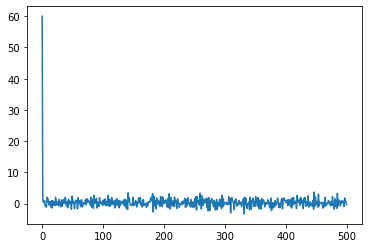



X0 =  70.0


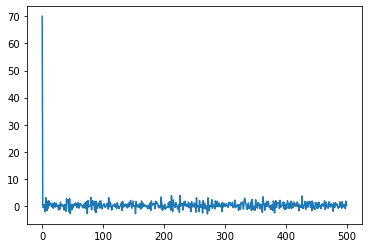



X0 =  80.0


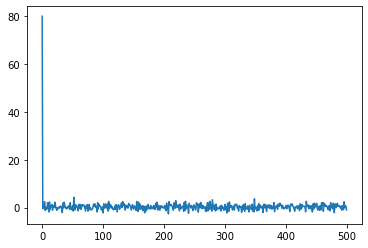



X0 =  90.0


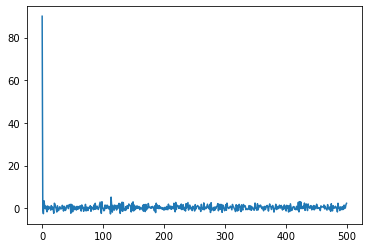



X0 =  100.0


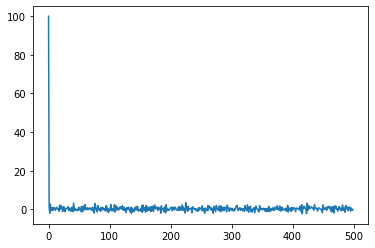

In [83]:
X0 = np.linspace(0,100,11)
for x in X0:
    print('X0 = ', x)
    path_generator(x,0.9,1,500)
    print('\n')

As X0 goes away from 0, the first few steps take X path back to around 0. As a result, if we exclude the first few steps, there are mean-reversion for every X0 hence possibly stationary. From the X0=0, we find that the conitional variance is constant hence an ARMA model would be suitable.

X0 =  0.0


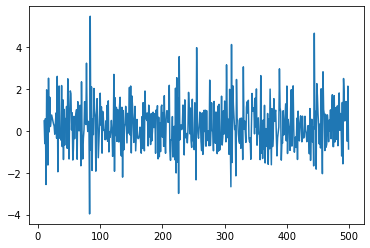

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.07463086678953375  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


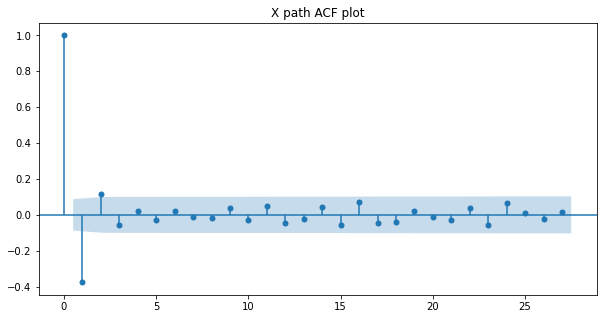



X0 =  10.0


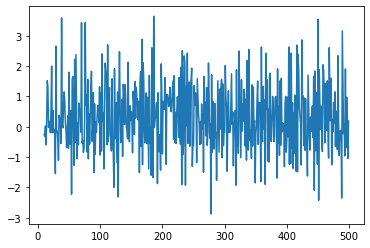

p value for ADF test:  4.3262667066080785e-26
p value for KPSS test:  0.1 

statistics for KPSS:  0.13941433570437767  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


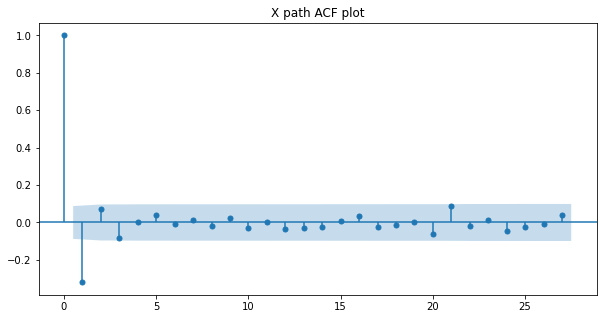



X0 =  20.0


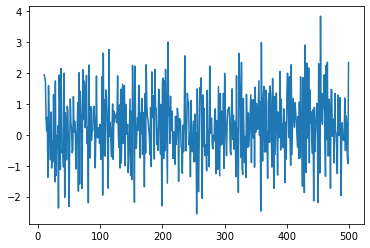

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.12863966496706064  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


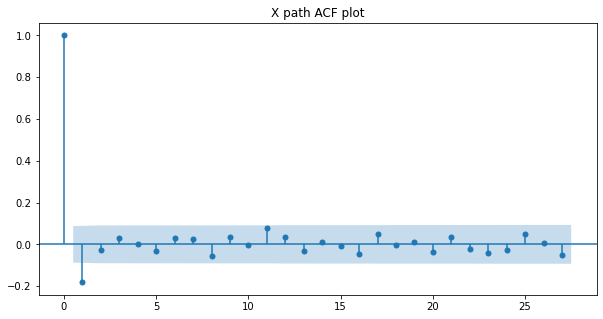



X0 =  30.0


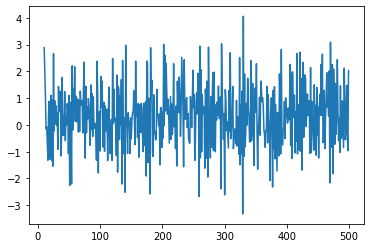

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.2128464467399283  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


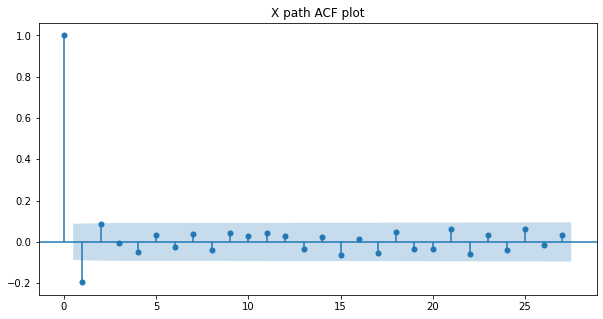



X0 =  40.0


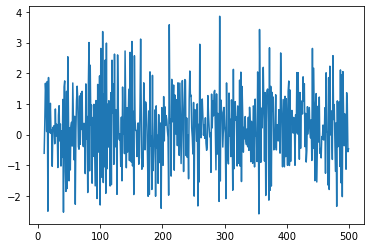

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.20753257777521697  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


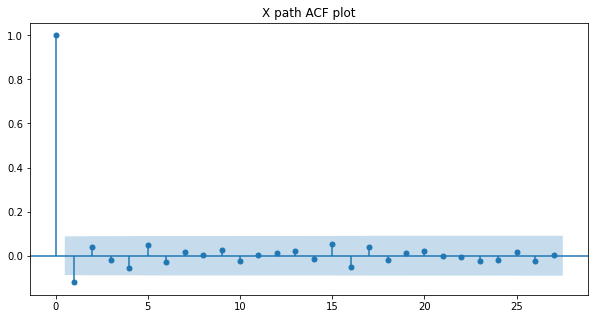



X0 =  50.0


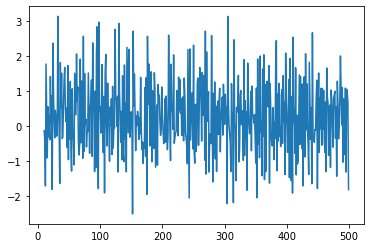

p value for ADF test:  0.0
p value for KPSS test:  0.07141724979823132 

statistics for KPSS:  0.41331198046810336  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


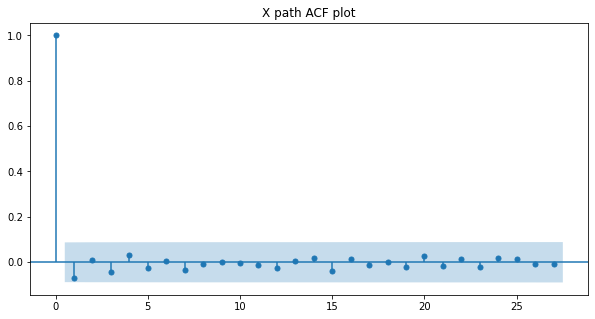



X0 =  60.0


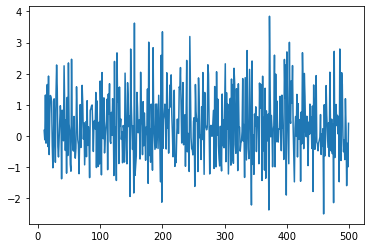

p value for ADF test:  3.9294324870115035e-30
p value for KPSS test:  0.1 

statistics for KPSS:  0.33948274080969126  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


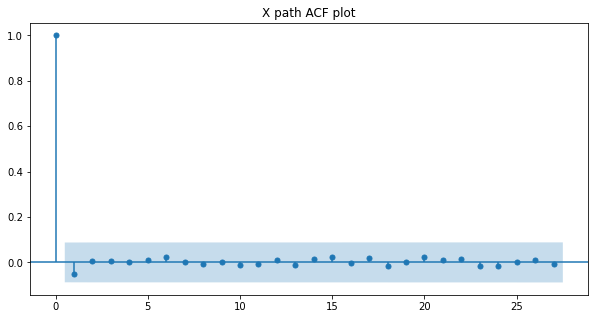



X0 =  70.0


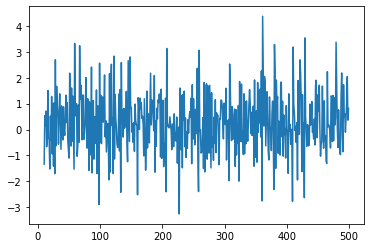

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.30067668729776487  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


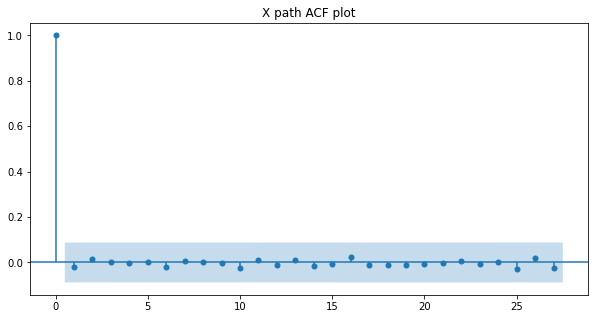



X0 =  80.0


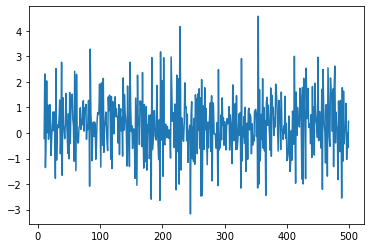

p value for ADF test:  0.0
p value for KPSS test:  0.09697007554785501 

statistics for KPSS:  0.35402942472897636  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


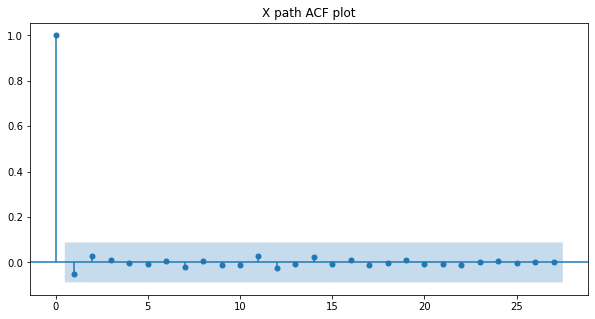



X0 =  90.0


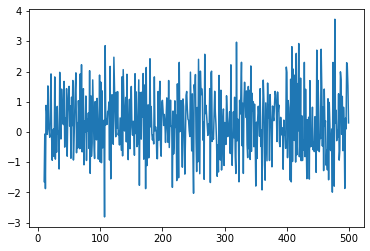

p value for ADF test:  0.0
p value for KPSS test:  0.0908373070892943 

statistics for KPSS:  0.36825744755283724  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


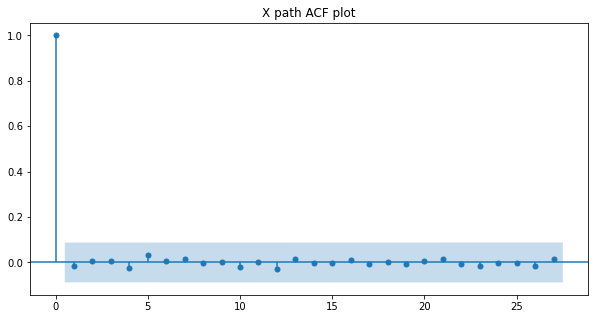



X0 =  100.0


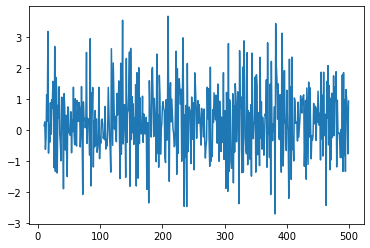

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.305042781246935  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


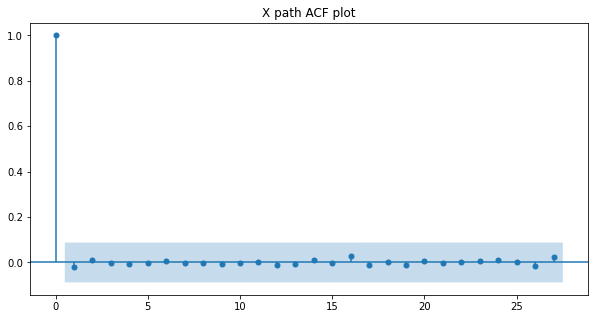

In [86]:
for x in X0:
    print('X0 = ', x)
    p = path_generator(x,0.9,1,500,partial_plot=10)
    first_step(p,'X path')
    print('\n')

ADF and KPSS tests both agree on stationarity for all X0. We find that the conitional variance is constant hence an ARMA model would be suitable. 

In [87]:
import scipy.stats as stats
import statsmodels.api as sm
def plot_diagnosticsTight3(data):

    fig, (ax2,ax3,ax4,ax5) = plt.subplots(1,4,figsize=(30,5))
    
    ax2.plot(data)
    ax2.grid()
    ax2.set_title("Data")
    
    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()
    
    ljbox_test = sm.stats.acorr_ljungbox(data,10)#package version
    
    ax4.plot(ljbox_test[1])
    ax4.axhline(y=0.05, color='r',ls='--')
    ax4.set_title("LB test")
    ax4.grid()
    
    fig = sm.qqplot(data, line='q', ax = ax5)
    ax5.grid()
    ax5.set_title('QQ plot against std normal')
    
    plt.tight_layout()

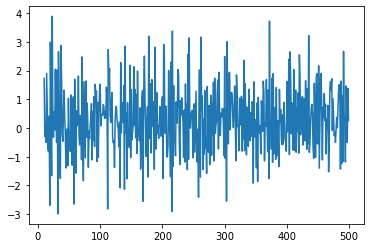

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(2, 0, 2); AIC=1494.693, BIC=1519.859, Fit time=0.144 seconds
Fit ARIMA: order=(0, 0, 0); AIC=1560.201, BIC=1568.590, Fit time=0.002 seconds
Fit ARIMA: order=(1, 0, 0); AIC=1493.541, BIC=1506.124, Fit time=0.015 seconds
Fit ARIMA: order=(0, 0, 1); AIC=1491.612, BIC=1504.196, Fit time=0.016 seconds
Fit ARIMA: order=(1, 0, 1); AIC=1491.434, BIC=1508.211, Fit time=0.055 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(1, 0, 2); AIC=1492.693, BIC=1513.665, Fit time=0.125 seconds
Fit ARIMA: order=(2, 0, 1); AIC=1493.175, BIC=1514.147, Fit time=0.086 seconds
Total fit time: 0.446 seconds
Selected order=  1 0 1
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  490
Model:                     ARMA(1, 1)   Log Likelihood                -741.717
Method:                       css-mle   S.D. of innovations              1.099
Date:                Mon, 30 Nov 2020   AIC                           1491.434
Time:                        22:49:20   BIC                           1508.211
Sample:                             0   HQIC                          1498.023
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


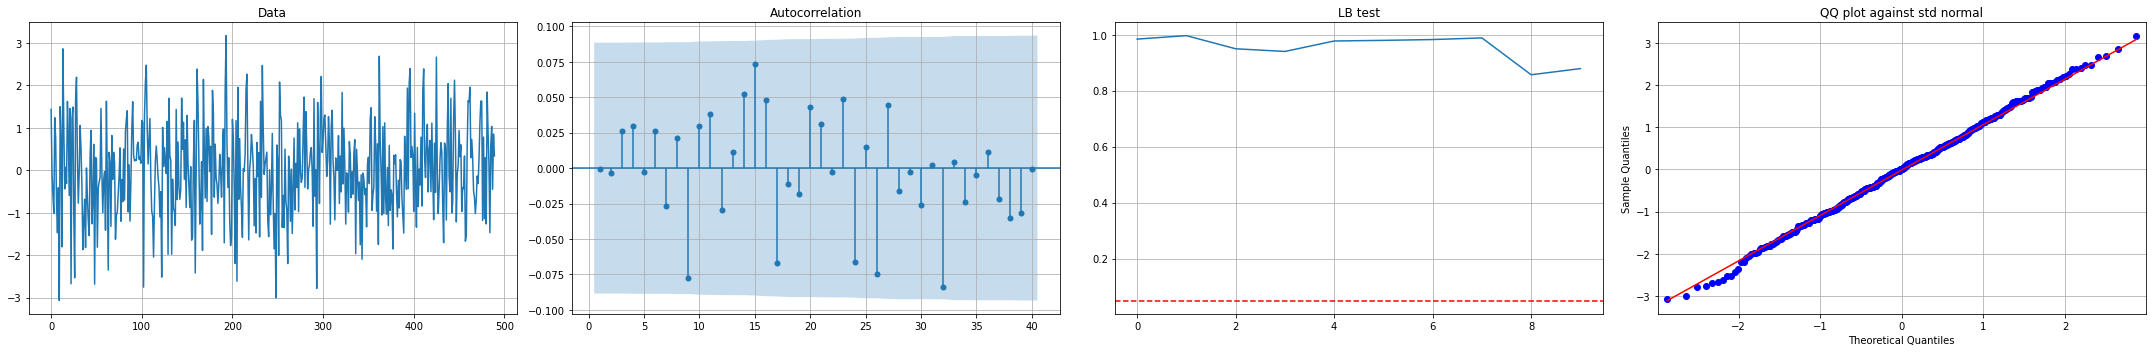

In [90]:
X0 = 3
path = path_generator(x,0.9,1,500,partial_plot=10)
path = path[10:] #eliminate the first few outliers
#we have already confirmed stationarity
t_results = pm.auto_arima(path,trace = True,seasonal=False, with_intercept=True) #d = 1
p, d, q = t_results.order
print('Selected order= ',p,d,q)

print(t_results.summary())

t_arima_resid = t_results.resid()
plot_diagnosticsTight3(t_arima_resid)

Auto_arima selection suggests ARMA(1,1). p = 1 is expected as $X_{t-1}$ is explicitly in the formula of $X_t$. After fitting the time series to ARMA(1,1), we check the fedelity of the model by observing the residual. The residuals are not-correlated (see the ACF plot), pass the Ljung-box Test (the blue line of p value is always above the boundary) and the distribution fits the normal distribution well (see the QQ plot). 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.267
Model:                            OLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                              177.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):                    9.28e-35
Time:                        23:10:12   Log-Likelihood:                         -715.21
No. Observations:                 489   AIC:                                      1432.
Df Residuals:                     488   BIC:                                      1437.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

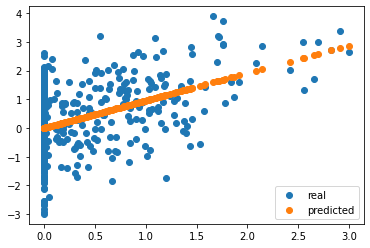

estimated phi value:  0.9580253269078927 

estimated sigma squared value:  1.09349613846539


In [91]:
regression_fit(path) #path of X, generated by X0=3, phi = 0.9, sigma = 1

We find that the estimated $\phi$ and $\sigma$ are close to their real values.